In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18,10]
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('train.csv')
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [4]:
train.shape

(101230332, 10)

In [5]:
train=train.set_index('row_id')

In [6]:
train.sample(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
75823362,3901217703,1614379840,8262,0,950,0,0,43000.0,True
26844381,3880251194,572626463,9272,0,2048,1,0,32000.0,True
72984157,170659711,1552762482,762,0,74,3,1,16000.0,True
97020283,2798080349,2058312810,2164,0,5172,0,0,5000.0,True
50123452,4076977797,1061477482,4829,0,699,3,1,23000.0,True
21487134,2005815390,461596151,4784,0,360,1,1,5000.0,True
6490280,7409416336,141184644,1796,0,67,3,1,59000.0,True
68267004,7773297894,1452529305,2094,0,1249,1,0,23000.0,True
61849005,7651537947,1313428980,8544,0,443,3,1,9000.0,True


In [7]:
train.content_type_id.value_counts()

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [8]:
#train=train.sample(1000000)

In [9]:
train.user_answer.value_counts()

 0    28186489
 1    26990007
 3    26084784
 2    18010020
-1     1959032
Name: user_answer, dtype: int64

In [10]:
train.answered_correctly.value_counts()

 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

In [11]:
lectures=pd.read_csv('lectures.csv')
lectures.sample(15)

,lecture_id,tag,part,type_of
352,27851,134,5,solving question
324,26052,183,4,concept
262,21411,163,2,solving question
101,8708,47,5,concept
193,16136,90,2,concept
94,8317,94,1,concept
107,9245,48,6,concept
55,4425,1,6,concept
77,6948,127,5,solving question
39,3255,60,5,concept


In [12]:
questions=pd.read_csv('questions.csv')
questions.sample(15)

,question_id,bundle_id,correct_answer,part,tags
7809,7809,7808,1,7,118 37 21
13096,13096,13094,1,4,136 67 81
10634,10634,10634,2,1,10 94 29
13147,13147,13145,0,4,136 92 59
9238,9238,9238,0,5,47
12012,12012,12012,0,2,90 100 92 29
13458,13458,13458,2,5,1
11040,11040,11039,2,6,73
11026,11026,11023,3,6,79
12759,12759,12759,0,1,131 93 92


In [13]:
train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True


In [14]:
train.user_id.nunique()

393656

C:\Users\rammstein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rammstein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


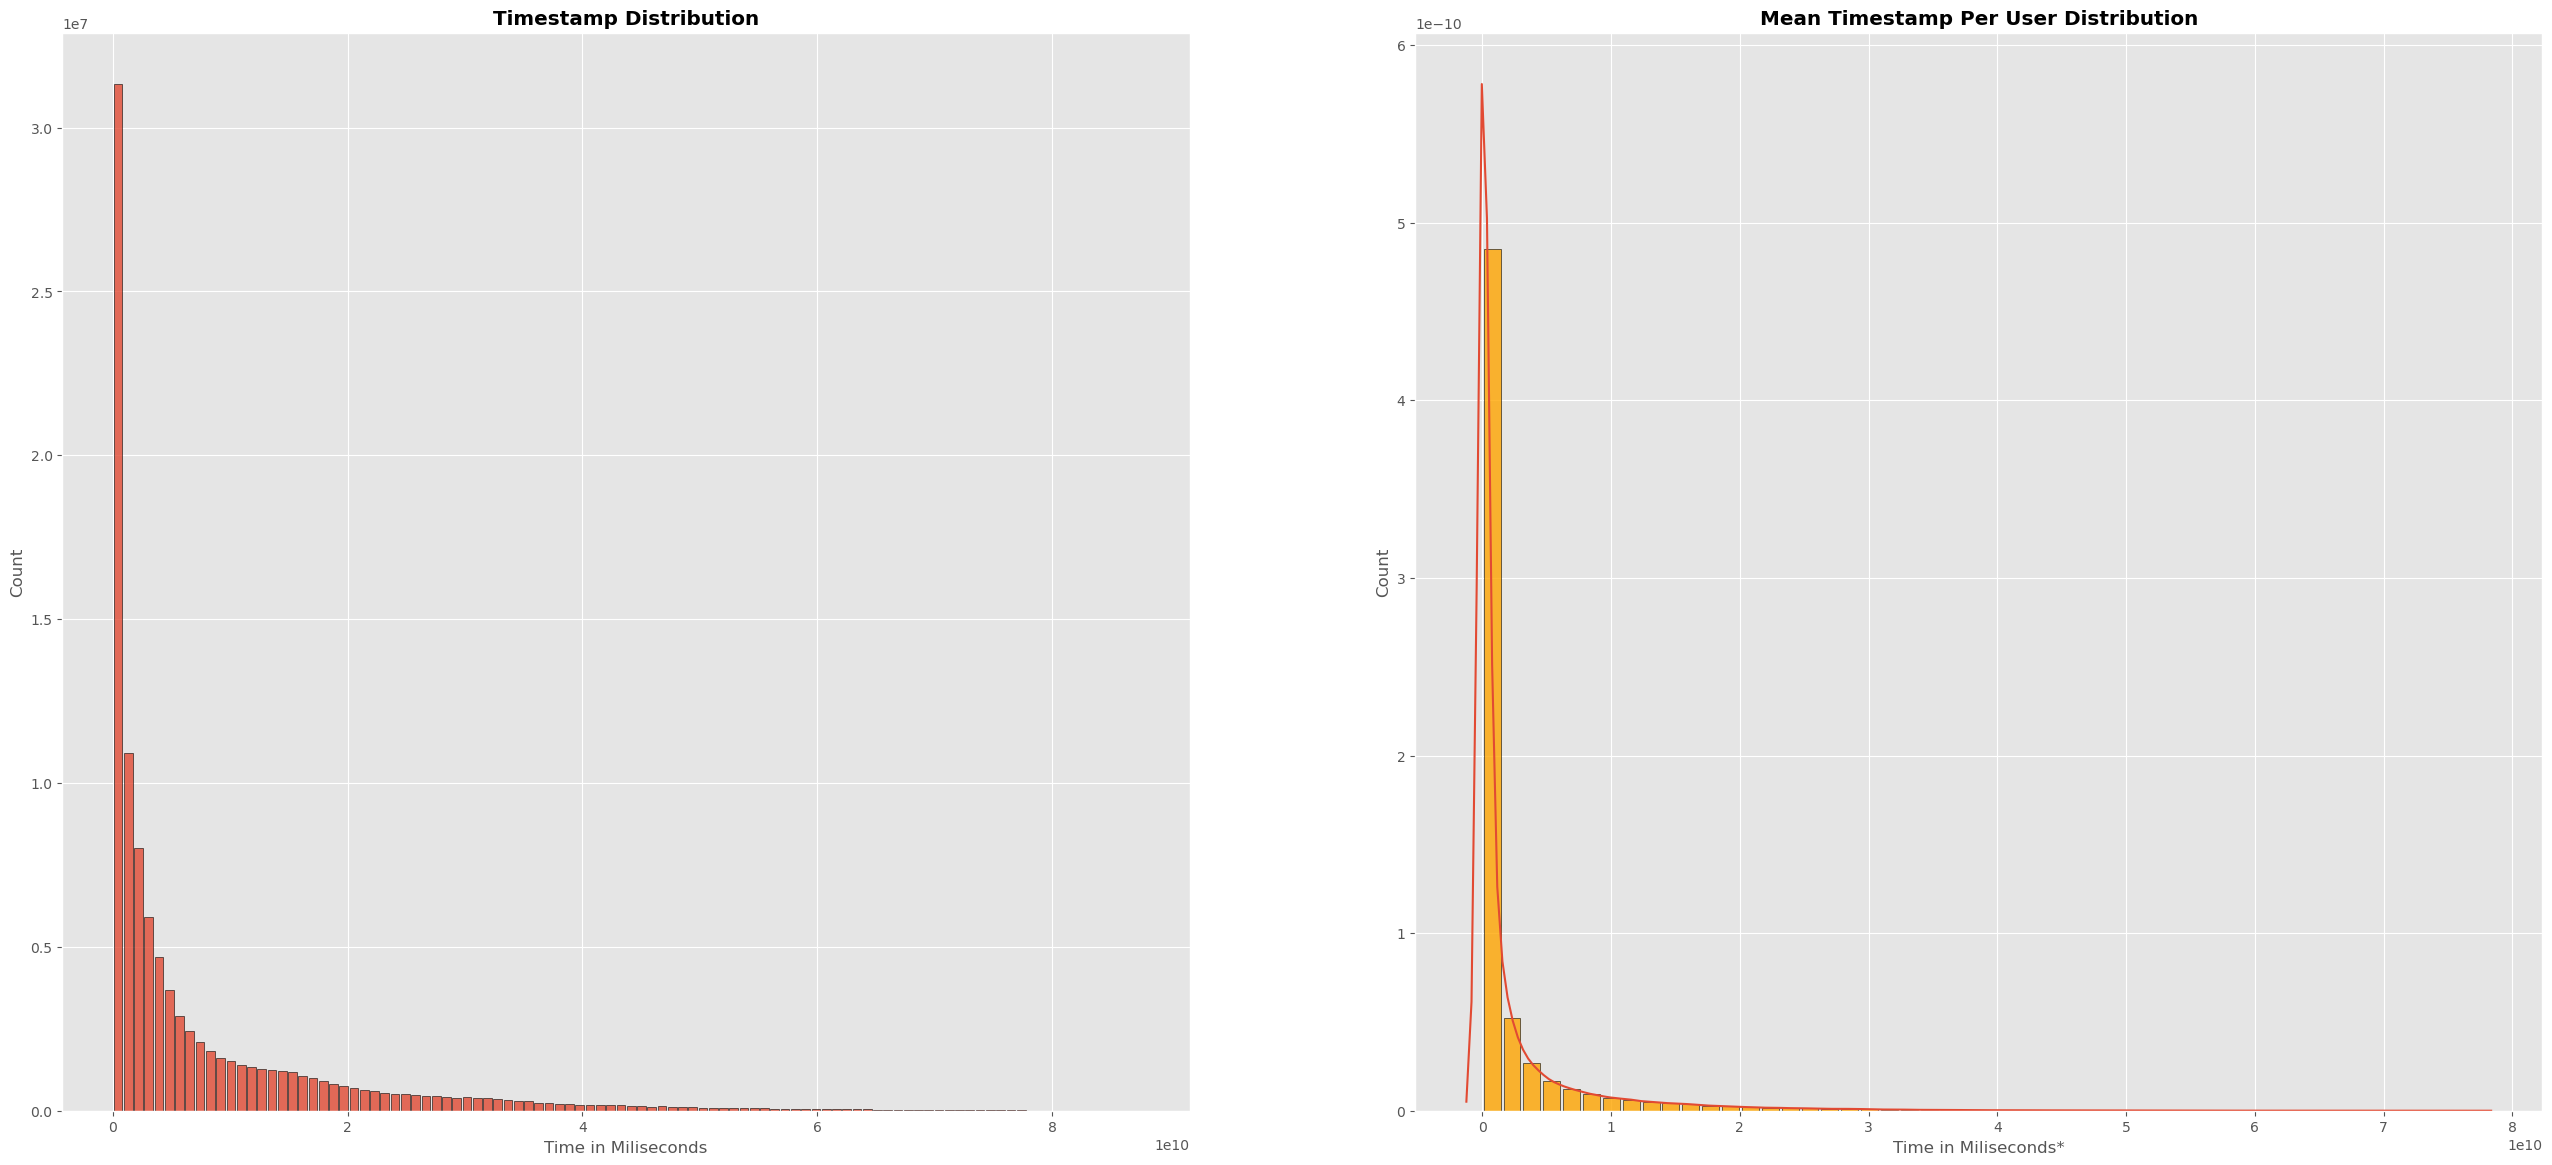

In [15]:
# из графика №1 видно, что меньшее количество времени на ответ требуется большему количеству людей
# из графика №2 распределение среднего времени на ответы для пользователей 

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(32,14))

sns.distplot(train.timestamp, kde=False,hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8}, bins=100, ax=ax[0])

ax[0].set_xlabel('Time in Miliseconds')
ax[0].set_ylabel('Count')
ax[0].set_title('Timestamp Distribution', weight='bold')


sns.distplot(train.groupby('user_id').agg({'timestamp': 'mean'}), hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                  'color':'orange',
                 'alpha': 0.8}, bins=50,ax=ax[1])

ax[1].set_xlabel('Time in Miliseconds*')
ax[1].set_ylabel('Count')
ax[1].set_title('Mean Timestamp Per User Distribution', weight='bold')

plt.show()

In [16]:
train[train.user_id==276328221]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
12755938,0,276328221,7900,0,0,0,1,NaN,NaN
12755939,22642,276328221,7876,0,1,3,1,32000.0,False
12755940,36926,276328221,175,0,2,0,0,20000.0,False
12755941,58565,276328221,1278,0,3,1,0,12000.0,False
12755942,238894,276328221,2065,0,4,2,1,15000.0,False
...,...,...,...,...,...,...,...,...,...
12757702,52480509634,276328221,3999,0,1751,1,1,5000.0,True
12757703,52480537274,276328221,9349,0,1752,3,1,42000.0,True
12757704,52480571283,276328221,3960,0,1753,0,1,12000.0,True


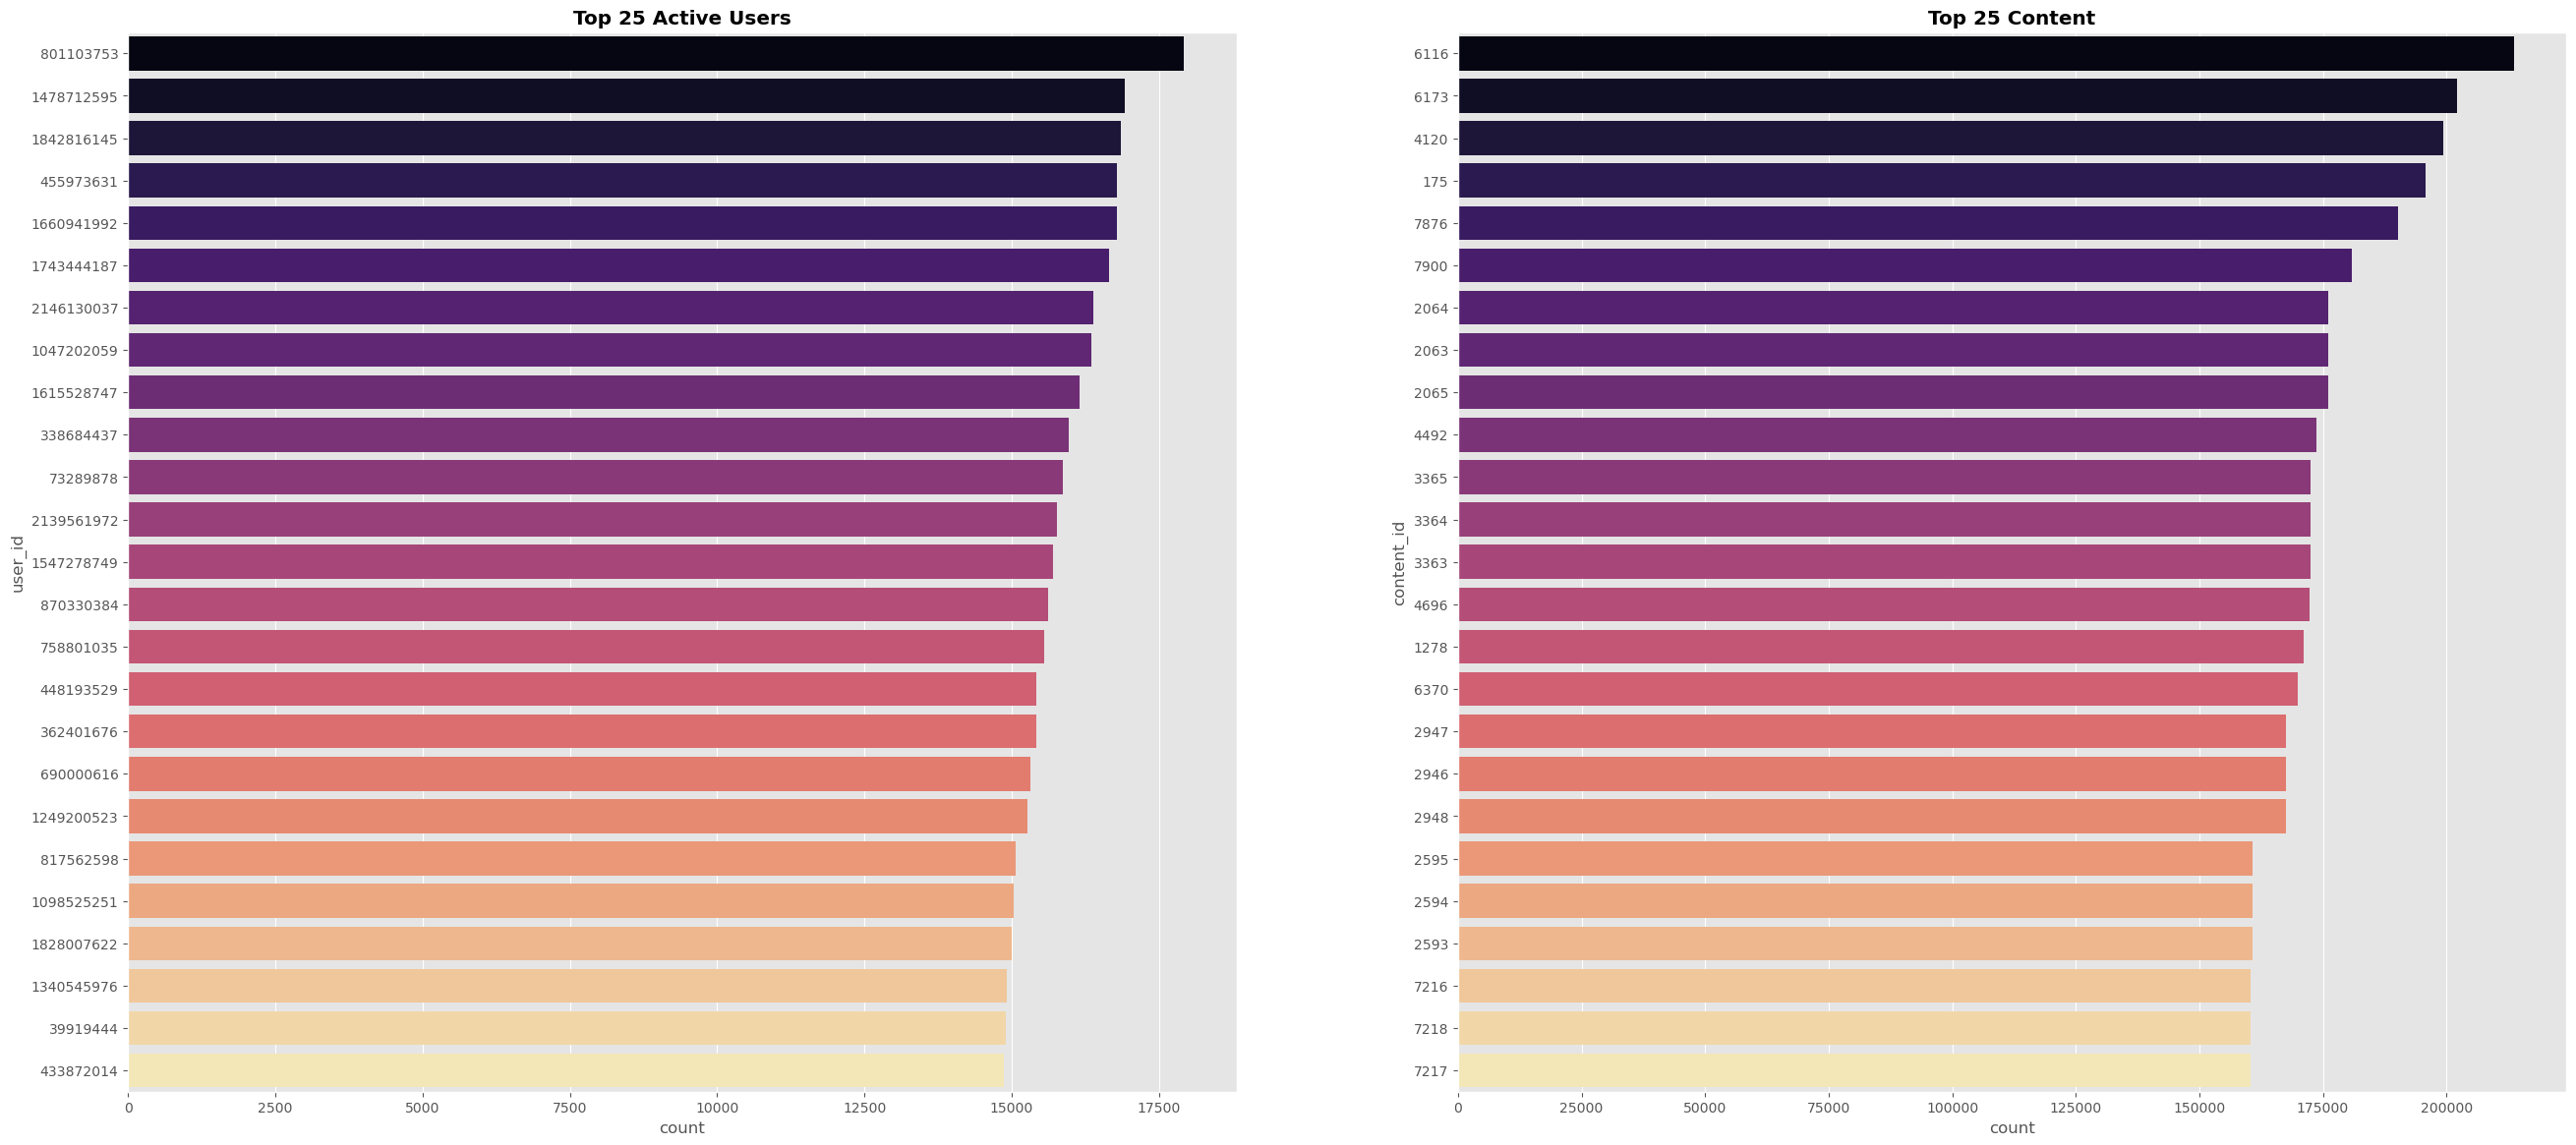

In [17]:
#  График 1 отображает самых активных пользователей
# График 2 отображает самый популярный контент

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(32,14))

# Distplot:

sns.countplot(y='user_id', data=train, order=train.user_id.value_counts().index[:25], palette='magma',ax = ax[0])
ax[0].set_title('Top 25 Active Users', weight='bold')

# Countplot:

sns.countplot(y='content_id', data=train, order=train.content_id.value_counts().index[:25], palette='magma',ax = ax[1])
ax[1].set_title('Top 25 Content', weight='bold')


plt.show()

In [18]:
train.user_id.value_counts().index[:25]

Int64Index([ 801103753, 1478712595, 1842816145,  455973631, 1660941992,
            1743444187, 2146130037, 1047202059, 1615528747,  338684437,
              73289878, 2139561972, 1547278749,  870330384,  758801035,
             448193529,  362401676,  690000616, 1249200523,  817562598,
            1098525251, 1828007622, 1340545976,   39919444,  433872014],
           dtype='int64')

In [19]:
usr_ans = train.groupby('user_id').agg({ 'answered_correctly': ['mean','sum', 'count']})
usr_ans.columns = ['avg_correct_answer','num_of_correct', 'total_answers']

usr_ans['num_of_correct'] = usr_ans['num_of_correct'].astype('int16')
usr_ans['total_answers'] = usr_ans['total_answers'].astype('int16')


train = pd.merge(train, usr_ans, how='left', on = 'user_id')

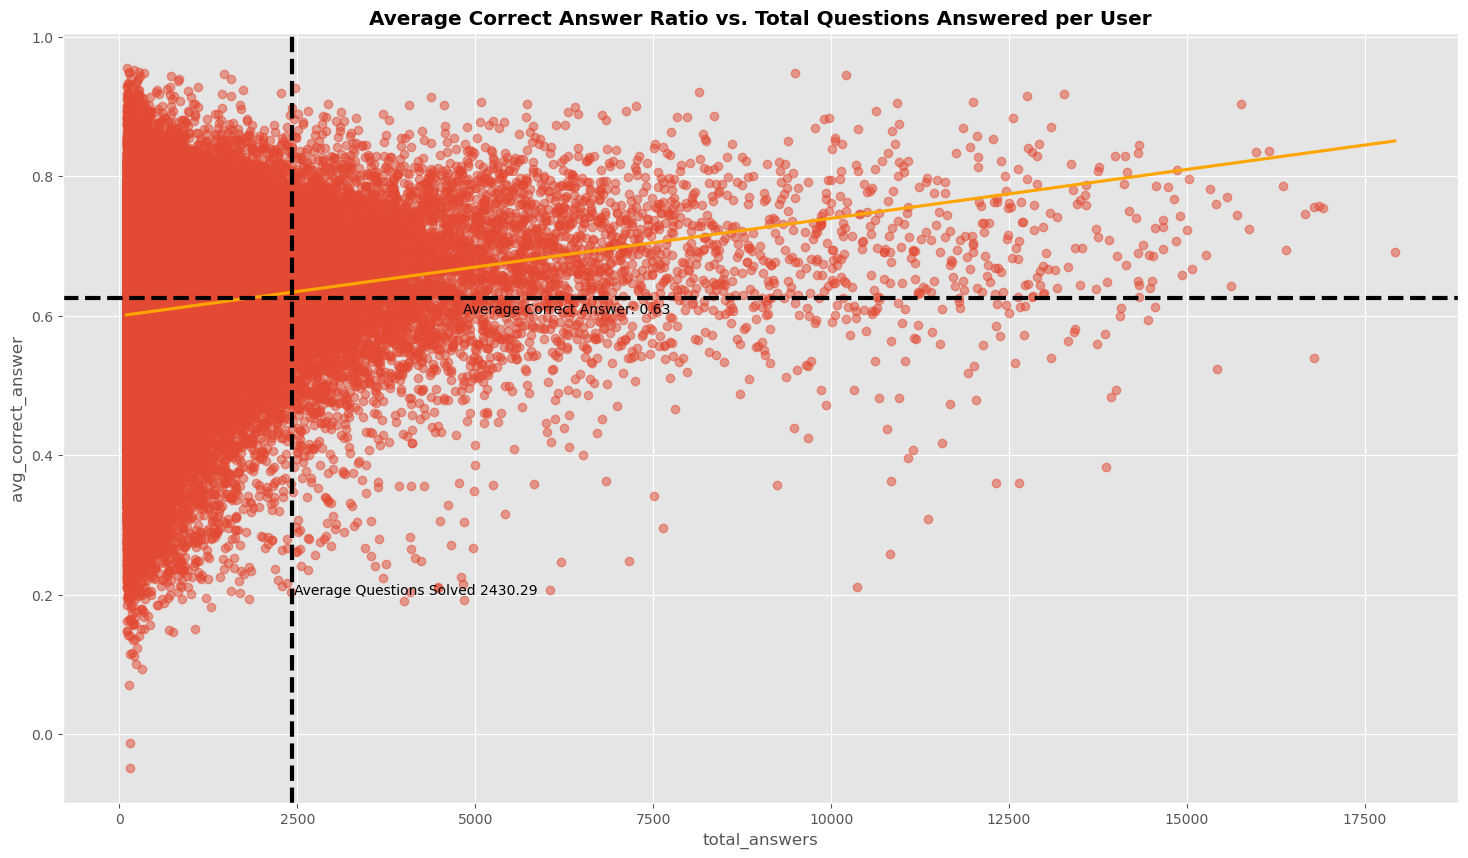

In [20]:
# Зависимость доли успешных решений от количества этиих решений. Эффективность растет.

sns.regplot(data=usr_ans[usr_ans['total_answers']> 100], y='avg_correct_answer', x='total_answers', ci=False, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
plt.axhline(train.avg_correct_answer.mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(train.total_answers.mean(), color='k', linestyle='dashed', linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(train.total_answers.mean()+25, max_ylim*0.20, 'Average Questions Solved {:.2f}'.format(train.total_answers.mean()))
plt.text(train.total_answers.mean()+2400, max_ylim*0.6, 'Average Correct Answer: {:.2f}'.format(train.avg_correct_answer.mean()))

plt.title('Average Correct Answer Ratio vs. Total Questions Answered per User', weight='bold')
plt.show()

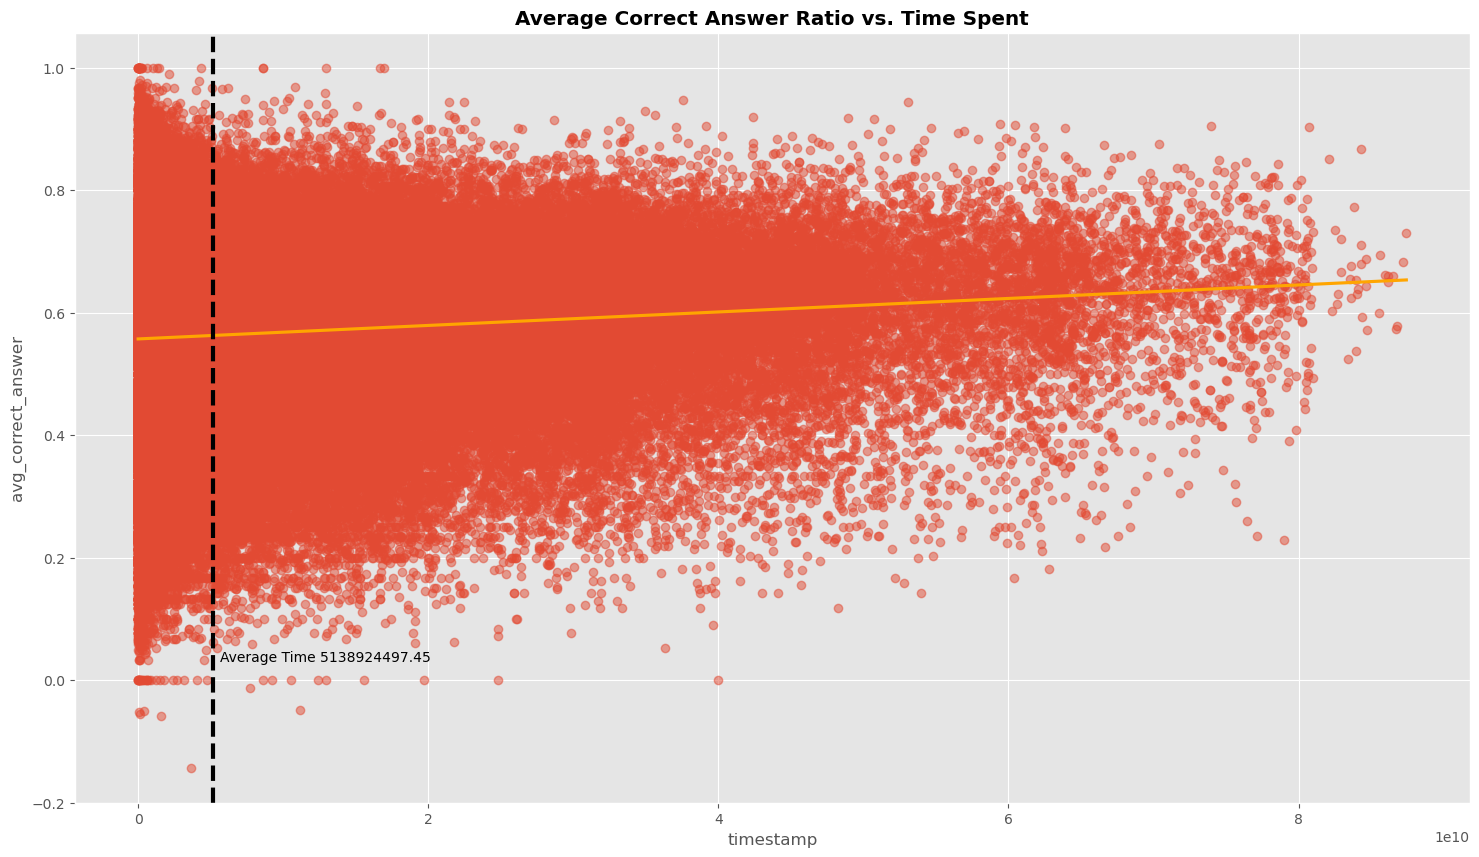

In [21]:
#зависимость доли успешных ответов от среднего времени проведенного за заданиями. Склонность больше думать над заданием приводила к лучшим результатам


total_time = train.groupby('user_id')["timestamp"].max()
total_time = pd.merge(total_time.reset_index(), usr_ans.reset_index(), how='left', on = 'user_id')

sns.regplot(data=total_time[total_time['timestamp']> 3.6e+6], y='avg_correct_answer', x='timestamp', ci=False, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})

plt.axvline(total_time.timestamp.mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(total_time.timestamp.mean()+total_time.timestamp.mean()*0.1, max_ylim*0.03, 'Average Time {:.2f}'.format(total_time.timestamp.mean()))

plt.title('Average Correct Answer Ratio vs. Time Spent', weight='bold')
plt.show()

